# Predicting House Prices in California with Linear Regression


# Set up

----------------------------
## Data Information
---------------------------



Attribute Information (in order):


--------------------------------------------
- longitude: A measure of how far west a house is; a higher value is farther west

- latitude: A measure of how far north a house is; a higher value is farther north

- housingMedianAge: Median age of a house within a block; a lower number is a newer building

- totalRooms: Total number of rooms within a block

- totalBedrooms: Total number of bedrooms within a block

-  population: Total number of people residing within a block

-  households: Total number of households, a group of people residing within a home unit, for a block

-  medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

-  medianHouseValue: Median house value for households within a block (measured in US Dollars)

- oceanProximity: Location of the house w.r.t ocean/sea

[Link to detailed variable definitions](https://github.com/shwetapai/Predicting-House-Prices-in-King-County)

###**Necessary libraries**

In [43]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import libraries for model evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

### Read in the data

In [44]:
import requests
import pandas as pd
from io import StringIO

orig_url="https://drive.google.com/file/d/1lkoBtU4xr8mIpP_VDED-yxoMu8HdOZBF/view?usp=sharing"
file_id = orig_url.split('/')[-2]
print(file_id)
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw,sep=',')
df.head()


1lkoBtU4xr8mIpP_VDED-yxoMu8HdOZBF


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY




---


# Project Exploratory Analysis


---



The code imports the necessary libraries (requests and pandas) to download and read a CSV file from a Google Drive URL. It constructs the download URL from the original shared URL, retrieves the CSV file's text content using requests, and reads the text into a pandas DataFrame for further data processing and analysis. This approach enables seamless integration of cloud-hosted data into Python workflows without local file downloads.

---------
### **Data information (data types, number of missing values, unique values for each variable)**
-------

1.Data information (data types, number of missing values, unique values for each variable)

The df.info() method displays a concise summary of the DataFrame, including the data types of each column, non-null count, and memory usage. The print('-'*50) statement prints a separating line for better readability. Finally, df.nunique() returns the count of unique values in each column of the DataFrame, helping identify potential categorical or unique identifier columns.

In [45]:
df.info()
print('-'*50)
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
--------------------------------------------------


longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

**Data Type**
* All the columns in the dataset are numerical except for ocean_proximity which is categorical.

**Number of Missing Value**
* There are a total of 20640 non-null observations in each of the columns except total_bedrooms. This indicates that there are no missing values in the data.

**Unique values for each variable**
* Unique Value of each column can be get from using nunique()

    housing_median_age       52
    \
    total_rooms            5926
    \
    total_bedrooms         1923
    \
    population             3888
    \
    households             1815
    \
    median_income         12928
    \
    median_house_value     3842
    \
    ocean_proximity           5


---------------------------
## **Data summaries (statistical summary of each variable)**
---------------------------

**2.Numerical Data Summary** (statistical summary of each variable)

The code sets the display format for floating-point numbers in pandas, then transposes and rounds the output of the describe() method, providing a summary of descriptive statistics for each numeric column in the DataFrame.

In [46]:
pd.set_option('display.float_format', str)
summary=df.describe().T
summary.round(2)

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.57,2.0,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,28.64,12.59,1.0,18.0,29.0,37.0,52.0
total_rooms,20640.0,2635.76,2181.62,2.0,1447.75,2127.0,3148.0,39320.0
total_bedrooms,20433.0,537.87,421.39,1.0,296.0,435.0,647.0,6445.0
population,20640.0,1425.48,1132.46,3.0,787.0,1166.0,1725.0,35682.0
households,20640.0,499.54,382.33,1.0,280.0,409.0,605.0,6082.0
median_income,20640.0,3.87,1.9,0.5,2.56,3.53,4.74,15.0
median_house_value,20640.0,206855.82,115395.62,14999.0,119600.0,179700.0,264725.0,500001.0


---------------------------
## **Histograms of all numercial variables**
Visual - Bar Chart

**3.Histograms of all numerical variables**

The code below creates a new DataFrame df1 with selected columns, then uses pandas and seaborn to generate a histogram plot for each of those columns, customizing the plot with specific parameters such as bin count, figure size, label sizes, and axis tick orientation. It also removes the top and right spines of the plot and adjusts the title size for better readability.

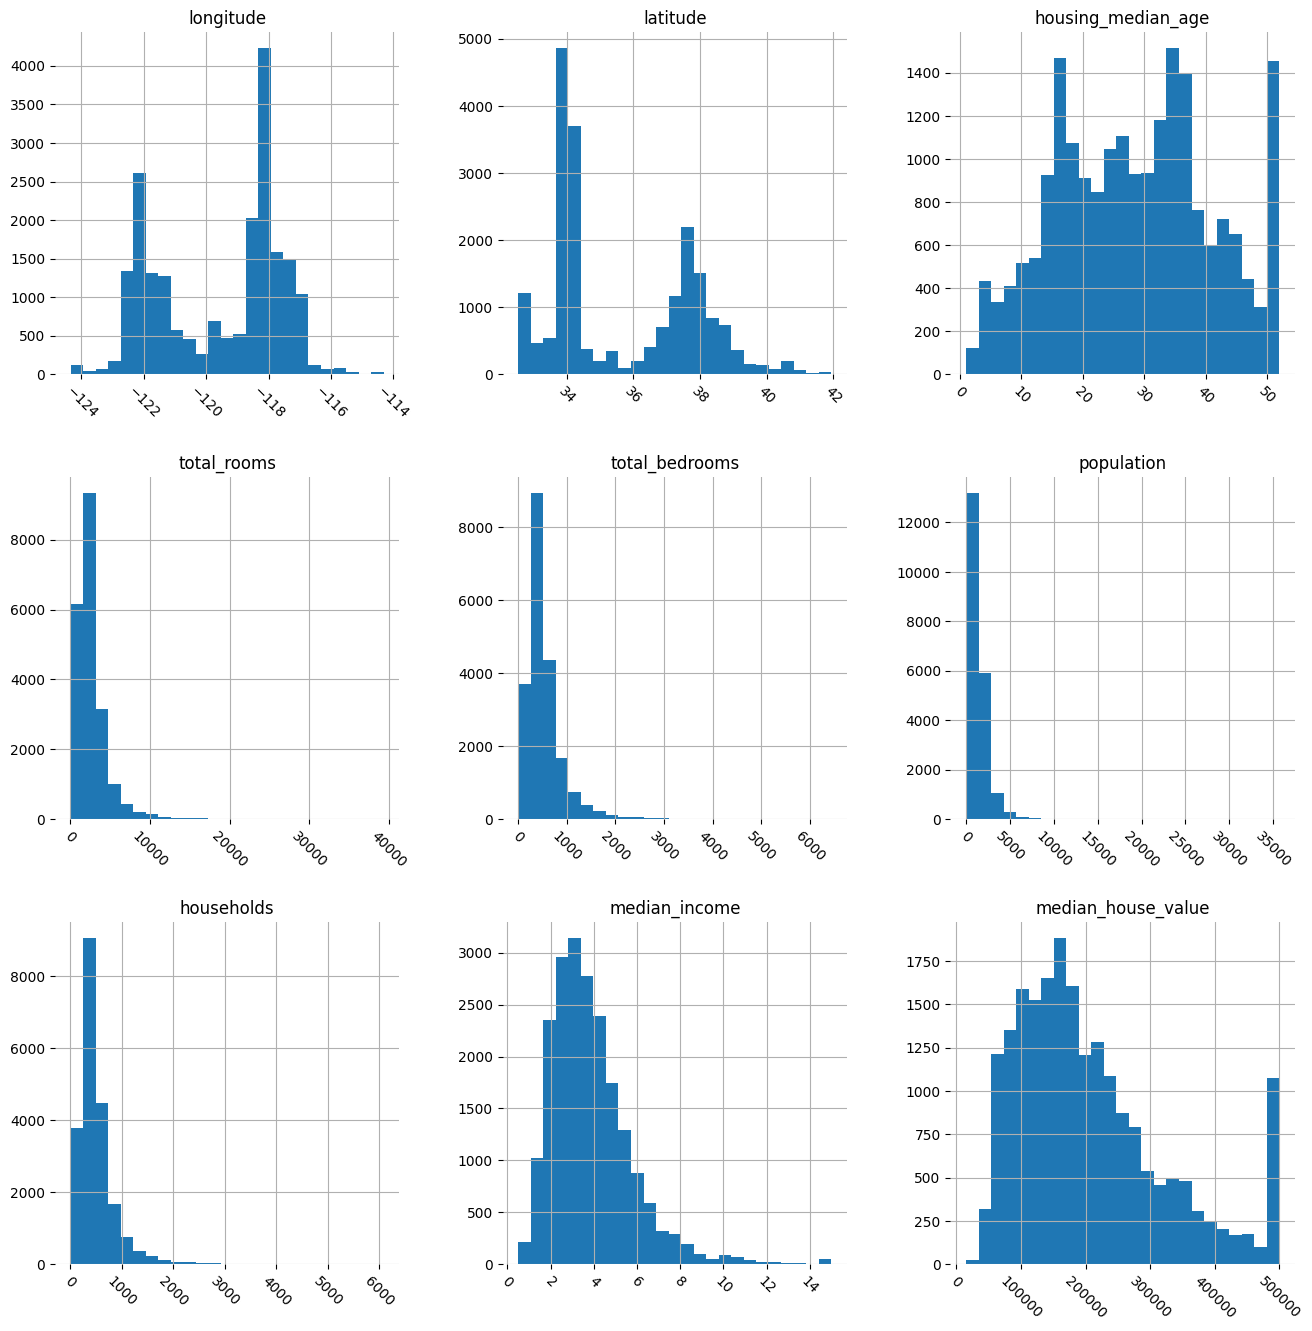

In [47]:
df_col=[]
for i in df:
  df_col.append(i)
df_col=df[df_col]

h = df_col.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-45)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

4.Visual for each categorical variable, bar chart, pie chart, or table

The code extracts and prints the unique values from the 'ocean_proximity' column, then creates a pie chart visualizing the distribution of those unique values, with each slice representing a category and its percentage within the data.

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


<Axes: >

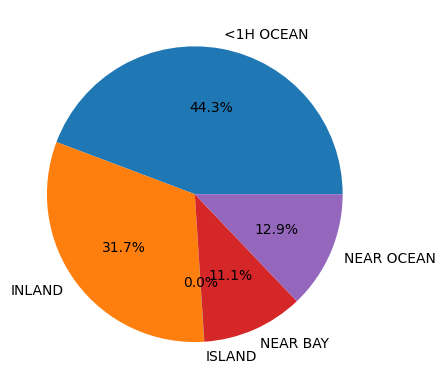

In [48]:
Category = df['ocean_proximity'].unique()
print(Category)
df2 = df[['ocean_proximity']]
df2.groupby('ocean_proximity').size().plot(kind='pie', autopct='%1.1f%%')

*Observation*

The target variable is slightly skewed. In such cases it is a good idead to apply a log transformation in order to avoid contradicting the assumption of linearity which is a necessary condition for applying a linear regression model.

--------
## **Handling Missing Value**
--------

While Handling the missing values we found that it is  less than 20% of records so, we went ahead and deleted rows with missing information.

In [49]:
print(df.isnull().sum())
updated_df = df.dropna(axis=0)
print(updated_df.info())
df=updated_df

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memor

---------------------------
## Examine the correlation matrix for the predictor variables
---------------------------


5.Examine the correlation matrix for the predictor variables

This code creates a heatmap to visualize pairwise correlations among variables in a DataFrame. It sets the figure size, defines a color palette for the heatmap, and computes the upper triangle of the correlation matrix to avoid redundancy. Finally, it generates the heatmap using Seaborn's heatmap function, annotating the cells with correlation values and masking the lower triangle to focus on unique correlations.

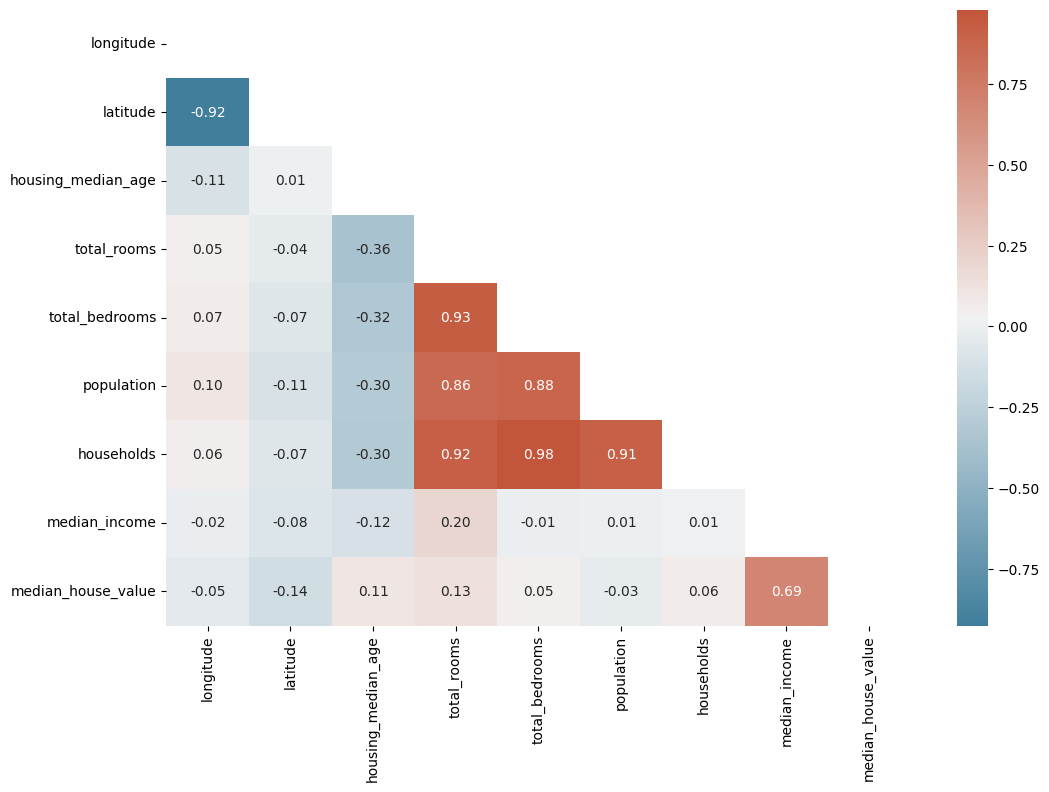

In [50]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# print(df.drop(columns="ocean_proximity"))
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.drop(columns="ocean_proximity").corr())

# Create a visual view of the pairwise correlations
sns.heatmap(df.drop(columns="ocean_proximity").corr(),annot=True,fmt='.2f',cmap=cmap, mask=matrix)
plt.show()

In [51]:
correlation_matrix = df.drop(columns="ocean_proximity").corr()
print(correlation_matrix)

                               longitude              latitude  \
longitude                            1.0   -0.9246161131160101   
latitude             -0.9246161131160101                   1.0   
housing_median_age  -0.10935654863027307  0.011899066824480742   
total_rooms           0.0454801674218395 -0.036666805610771125   
total_bedrooms       0.06960802175408133  -0.06698283471949555   
population           0.10027030094083503  -0.10899734357206249   
households          0.056512772430637834  -0.07177418526952299   
median_income      -0.015550150379729375  -0.07962631913885085   
median_house_value  -0.04539821933443104   -0.1446382115762039   

                     housing_median_age           total_rooms  \
longitude          -0.10935654863027307    0.0454801674218395   
latitude           0.011899066824480742 -0.036666805610771125   
housing_median_age                  1.0  -0.36062829984244227   
total_rooms        -0.36062829984244227                   1.0   
total_bedrooms

**Observations:______**  
Positive correlations of note are observed between:

**sqft_living is positively correlated with bathrooms, grade, sqft_above, and sqft_living15.
sqft_lot is positively correlated with sqft_lot15**  

Negative correlations of note are observed between:

None



---
# Project Pre-processing
---



---
## 2.1 Convert values of categorical (object) variables into numerical values

---

Since there are no explicit binary variables provided in the  dataset we couldnt convert any. Similarly, there are no explicit ordinal variables provided in the dataset.The 'ocean_proximity' column has more than two unique values, so it has been converted into dummy variables.

In [52]:
df = pd.get_dummies(data=df, columns=['ocean_proximity'], drop_first=False, dtype=float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_<1H OCEAN   20433 non-null  float64
 10  ocean_proximity_INLAND      20433 non-null  float64
 11  ocean_proximity_ISLAND      20433 non-null  float64
 12  ocean_proximity_NEAR BAY    20433 non-null  float64
 13  ocean_proximity_NEAR OCEAN  20433 no

---
## 2.2 Feature engineering
---
- It may be useful to modify variables or combine more than one variable using a mathematical operation.
- We didn't find the need to modify/combine any variable

----
## 2.3 Removing feature variables which is highly correlated with other
----
- Based on the correlation analysis, consider removing feature variables that are highly correlated with other features.



In [53]:
# Remove highly correlated variables
df.drop(columns=['total_rooms', 'total_bedrooms'], inplace=True)

---
## 2.4 Removing unuseful variable
---

- Remove variables that you don't think will be useful to the analysis based on your domain knowledge of the phenomenon being studied.

---
## 2.5 Bivariate analysis of numerical data and Remove the outliers
---
Look at scatterplots to determine if there are any outliers in the data and consider removing the rows containing outliers.

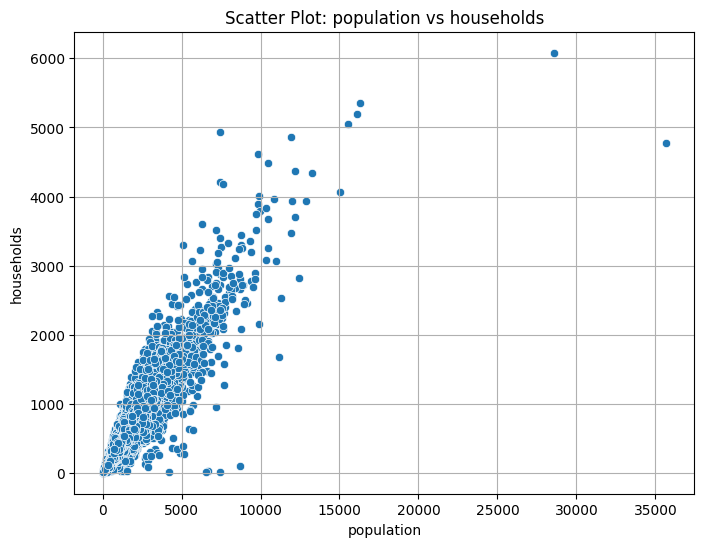

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pairs of features with significant correlations (>0.7)
correlated_pairs = [ ('population', 'households')]

# Create scatter plots for each pair of features
for pair in correlated_pairs:
    feature1, feature2 = pair
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature1], y=df[feature2])
    plt.title(f'Scatter Plot: {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True)
    plt.show()

In [55]:
dft = df[df['population'] < 7000]
dft=dft[dft['households']<3000]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between population and households is', pearsonr(dft['population'], dft['households'])[0])

The correlation between population and households is 0.8986331280490433


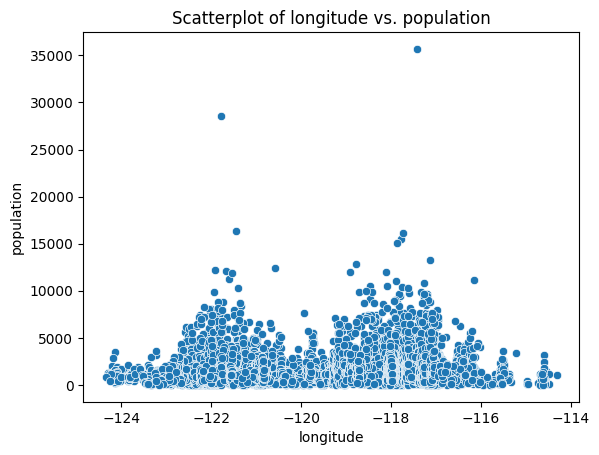

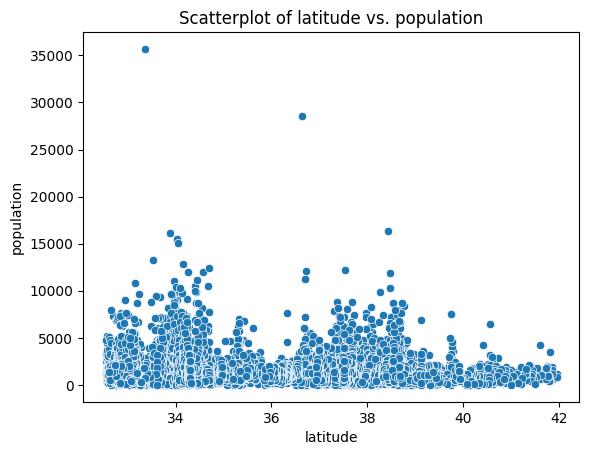

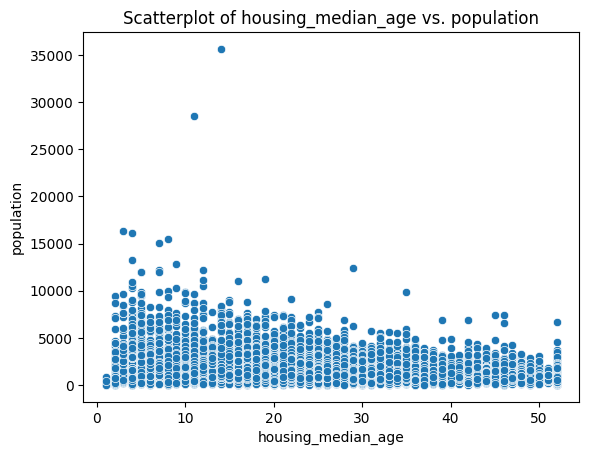

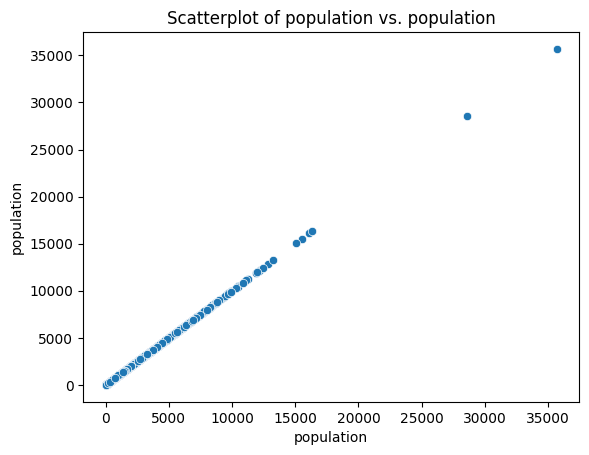

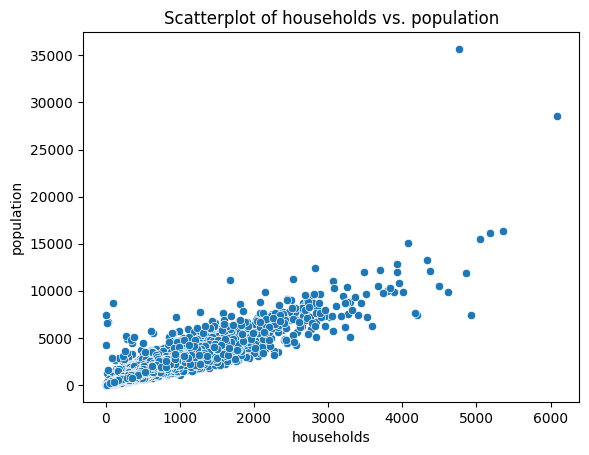

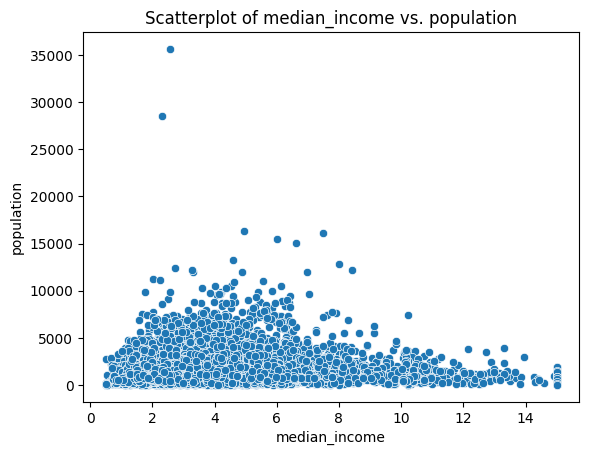

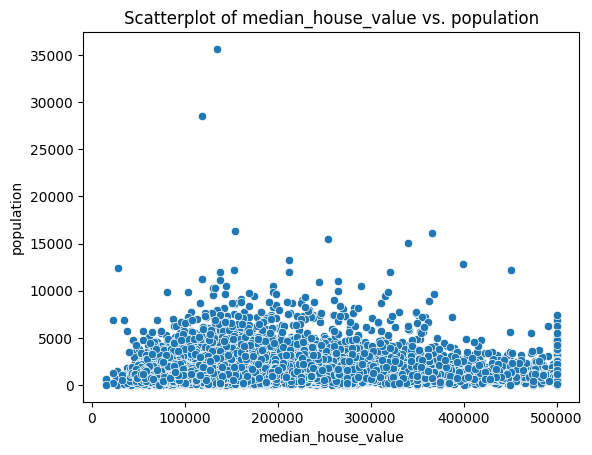

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric variables
numeric_vars = ['longitude', 'latitude', 'housing_median_age',
                 'population',
                'households', 'median_income', 'median_house_value']

# Plot scatterplots for each numeric variable against the target variable
for var in numeric_vars:
    sns.scatterplot(x=df[var], y=df['population'])
    plt.title(f'Scatterplot of {var} vs. population')
    plt.xlabel(var)
    plt.ylabel('population')
    plt.show()

---
## 2.6 log-transform the target variable
---
For those doing a regression analysis, it may be necessary to log-transform the target variable (is the histogram skewed or symmetric? If skewed, convert all values of the target variable to log(target variable).

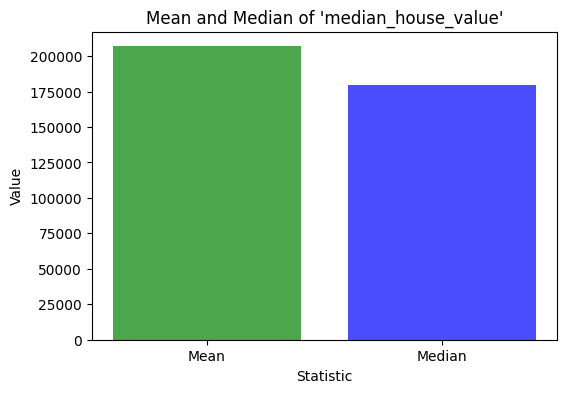

In [69]:
import numpy as np

# Calculate mean and median for 'median_house_value'
mean_value = df['median_house_value'].mean()
median_value = df['median_house_value'].median()

# Data for the bar plot
summary_stats = {
    'Statistic': ['Mean', 'Median'],
    'Value': [mean_value, median_value]
}

# Create a DataFrame for the bar plot
summary_df = pd.DataFrame(summary_stats)

# Plot the bar plot
plt.figure(figsize=(6, 4))
plt.bar(summary_df['Statistic'], summary_df['Value'], color=['green', 'blue'], alpha=0.7)

# Customize the plot
plt.title("Mean and Median of 'median_house_value'")
plt.xlabel("Statistic")
plt.ylabel("Value")
plt.show()

# Log-transform the target variable
df['log_median_house_value'] = np.log1p(df['median_house_value'])

## 2.7 Separate the feature variables from the target variable

In [72]:
# Define the features (predictor variables) and the target variable
X = df.drop(columns={'log_median_house_value','median_house_value'})  # Features
y = df['log_median_house_value']  # Target variable
print(X.head())

   longitude  latitude  housing_median_age  population  households  \
0    -122.23     37.88                41.0       322.0       126.0   
1    -122.22     37.86                21.0      2401.0      1138.0   
2    -122.24     37.85                52.0       496.0       177.0   
3    -122.25     37.85                52.0       558.0       219.0   
4    -122.25     37.85                52.0       565.0       259.0   

   median_income  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0         8.3252                        0.0                     0.0   
1         8.3014                        0.0                     0.0   
2         7.2574                        0.0                     0.0   
3         5.6431                        0.0                     0.0   
4         3.8462                        0.0                     0.0   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                       1.0   
1                     0.0                 

---
## 2.8 Scale the predictor variables in preparation for any regression techniques you are planning to use
---

In [73]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the predictor variables to be scaled
predictor_vars = ['housing_median_age','population', 'households', 'median_income']

# Scale the selected predictor variables
df_scaled = df.copy()  # Created a copy of the DataFrame to store scaled values
df_scaled[predictor_vars] = scaler.fit_transform(df[predictor_vars])

In [74]:
df_scaled.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,log_median_house_value
0,-122.23,37.88,0.9821633124298519,-0.9733195161260458,-0.9768332722738569,2.3451629104250675,452600.0,0.0,0.0,0.0,1.0,0.0,13.022766221635607
1,-122.22,37.86,-0.606210165496261,0.861339237553228,1.6703726236687724,2.3326316135945775,358500.0,0.0,0.0,0.0,1.0,0.0,12.7896867284182
2,-122.24,37.85,1.8557687252892139,-0.8197694328455294,-0.8434266510356413,1.782939433299161,352100.0,0.0,0.0,0.0,1.0,0.0,12.771673345241355
3,-122.25,37.85,1.8557687252892139,-0.765056184780058,-0.7335623747218168,0.9329700016412193,341300.0,0.0,0.0,0.0,1.0,0.0,12.740520064864135
4,-122.25,37.85,1.8557687252892139,-0.7588788825791177,-0.6289297306134125,-0.013142909060728857,342200.0,0.0,0.0,0.0,1.0,0.0,12.74315356270364


---
## 2.9 Split the data into training and testing
---
Seperate feature variable form target variable

In [75]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Print the shapes of the training and testing sets
print("Training set shape (X):", X_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (y):", y_test.shape)

Training set shape (X): (14303, 11)
Testing set shape (X): (6130, 11)
Training set shape (y): (14303,)
Testing set shape (y): (6130,)


## **Bivariate analysis of categorical variables Visual -stacked or side-by bars relative to values of target variable**

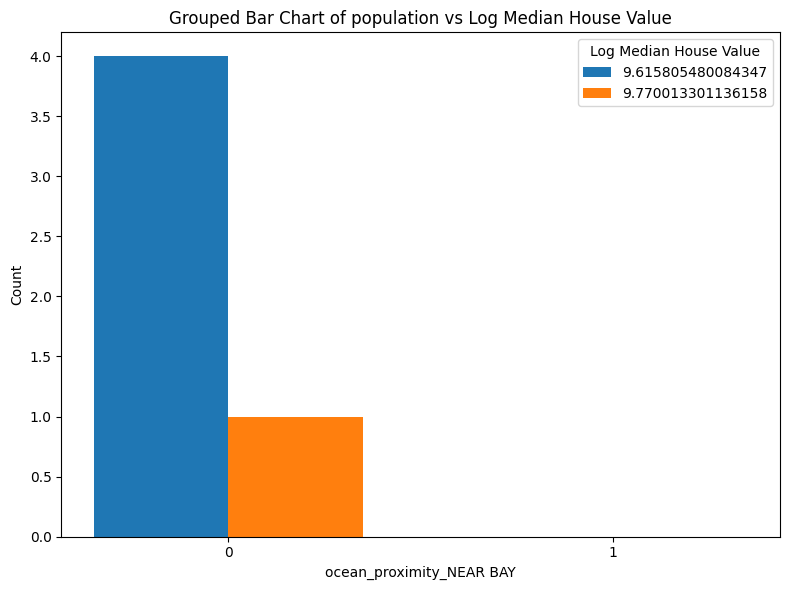

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the necessary columns

# Create a cross-tabulation of the categorical variable with the target variable
cross_tab = pd.crosstab(df['ocean_proximity_NEAR BAY'], df['log_median_house_value'])

# Plot the grouped bar chart using Matplotlib
plt.figure(figsize=(8, 6))
width = 0.35
x = cross_tab.index
bar1 = plt.bar(x - width/2, cross_tab.iloc[:, 0], width, label=str(cross_tab.columns[0]))
bar2 = plt.bar(x + width/2, cross_tab.iloc[:, 1], width, label=str(cross_tab.columns[1]))
plt.title('Grouped Bar Chart of population vs Log Median House Value')
plt.xlabel('ocean_proximity_NEAR BAY')
plt.ylabel('Count')
plt.xticks(x)
plt.legend(title='Log Median House Value')
plt.tight_layout()
plt.show()


# Regression Model Fit and Evaluation
Take a closer look at multicollinearity (correlation of predictor variables), which can be done with the Variance Inflation Factor detection procedure. The general rule is to remove the variables with VIF larger than 5.

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]

    return vif

V = checking_vif(X_train)
print(V)


# check whether column's VIF is greater than 5 or not(close to 5 is also acceptable)
def check_vif_larger_than_5(source):
  larger=[]
  for i in range(len(source)):
    if source.T[i]["VIF"]>8:
      larger.append(source.T[i]["feature"])

  return larger


print(check_vif_larger_than_5(V))

# create the model after dropping TAX
X_train = X_train.drop(columns = check_vif_larger_than_5(V)) #Write your code here
X_test = X_test.drop(columns = check_vif_larger_than_5(V))
# check for VIF
print(checking_vif(X_train))

                       feature                VIF
0                    longitude  17.50477097716291
1                     latitude 19.420538379558153
2           housing_median_age 1.3162851852468482
3                   population 5.7239439429418875
4                   households 5.7504317371637175
5                median_income  1.121850200074071
6    ocean_proximity_<1H OCEAN 14344.979592593167
7       ocean_proximity_INLAND 10108.221338708747
8       ocean_proximity_ISLAND  5.606148607573708
9     ocean_proximity_NEAR BAY 3673.9648143244626
10  ocean_proximity_NEAR OCEAN 4212.1436192695055
['longitude', 'latitude', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
                  feature                VIF
0      housing_median_age 2.9115191031850842
1              population 14.234102856568857
2              households 14.708977764980549
3           median_income  3.464031376092546
4  ocean_proximity_ISLAND  1.0005542

## Model Fitting

In [78]:
# create the model
model1 = sm.OLS(y_train,X_train).fit() #write your code here

# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     log_median_house_value   R-squared (uncentered):                   0.948
Model:                                OLS   Adj. R-squared (uncentered):              0.948
Method:                     Least Squares   F-statistic:                          5.248e+04
Date:                    Thu, 02 May 2024   Prob (F-statistic):                        0.00
Time:                            19:22:46   Log-Likelihood:                         -34761.
No. Observations:                   14303   AIC:                                  6.953e+04
Df Residuals:                       14298   BIC:                                  6.957e+04
Df Model:                               5                                                  
Covariance Type:                nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
housing_median_age         0.1828      0.001    145.475      0.000       0.180       0.185
population                 0.0003   4.74e-05      7.265      0.000       0.000       0.000
households                 0.0032      0.000     23.244      0.000       0.003       0.004
median_income              1.0538      0.010    105.696      0.000       1.034       1.073
ocean_proximity_ISLAND    -1.4903      1.945     -0.766      0.444      -5.303       2.322
==============================================================================
Omnibus:                     1635.529   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4752.685
Skew:                          -0.619   Prob(JB):                         0.00
Kurtosis:                       5.538   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking at Model Summary
Pay attention at F-statistic, the R-squared value, and the p-values associated with the coefficients.
- F-statistic: 5.248e+04

  This is a measure of how well the overall regression model fits the data. It assesses the significance of the regression model as a whole. A higher F-statistic indicates a better fit of the model to the data. In this case, an F-statistic of2.071e+04 suggests that the regression model is highly significant.
- R-squared: 0.948
  
  This is a measure of the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 0 indicates that the model does not explain any variability in the dependent variable, and 1 indicates that the model explains all the variability. An R-squared value of 0.948 indicates that your model explains approximately 94.8% of the variance in the dependent variable, which is quite high.
- P-values:
  - housing_median_age : 0.000
  - median_income: 0.000
  - median_hous_value: 0.000

  These indicate the significance of each coefficient in the regression model. A low p-value (typically less than 0.05) suggests that the corresponding coefficient is statistically significant. In this case, all the p-values are reported as 0.000, which indicates that all the coefficients (housing_median_age, median_income, and median_house_value) are highly significant.


Based on these statistics, it seems like your regression model performs quite well and the coefficients are statistically significant in explaining the variability in the dependent variable.

---
## **Equations**
$$
MedianHousingPrice = 10^{(0.1828{HousingMedianAge}+0.0003Population+0.032Households+1.0538MedianIncome-1.4903OceanProximityIsland)}
$$

## Compare the training and testing results

In [79]:
# RMSE
def rmse(predictions, targets):
	return np.sqrt(((targets - predictions) ** 2).mean())

# MAPE
def mape(predictions, targets):
	return np.mean(np.abs((targets - predictions)) / targets) * 100

# MAE
def mae(predictions, targets):
	return np.mean(np.abs((targets - predictions)))

def model_pref(olsmodel,x_train, x_test):

	# Insample Prediction
	y_pred_train = olsmodel.predict(x_train)
	y_observed_train = y_train

	# Prediction on test data
	y_pred_test = olsmodel.predict(x_test)
	y_observed_test = y_test

	print(
		pd.DataFrame(
			{
				"Data": ["Train", "Test"],
				"RMSE": [
					rmse(y_pred_train, y_observed_train),
					rmse(y_pred_test, y_observed_test),
				],

				"MAE": [
					mae(y_pred_train, y_observed_train),
					mae(y_pred_test, y_observed_test),
				],

				"MAPE": [
					mape(y_pred_train, y_observed_train),
					mape(y_pred_test, y_observed_test),
				],
			}
		)
	)

# Checking model performance
model_pref(model1, X_train, X_test)

    Data               RMSE                MAE               MAPE
0  Train 2.7494423073945478  2.101514008014697 17.424606364062576
1   Test  2.720918670413856 2.0727371369898275 17.159050886872045


### **Evaluate the performance of testing and training datasets (use RMSE, MAE)**

- **RMSE**: RMSE for the training and testing data set are quite close, indicating the model's consistency across training and testing datasets.

- **MAE**: Similar to RMSE, the MAE values for train and test sets are also close, suggesting that the model's performance does not significantly differ between these sets.

- **MAPE**: Like RMSE and MAE, the MAPE values for train and test are close, indicating a consistent error rate as a percentage.

Because the RMSE, MAE, and MAPE values for both the training and testing sets are similar, it indicates that the model generalizes effectively. This observation implies:

- **Minimal Overfitting**: The model isn't over-tailored to the training data, suggesting it maintains good performance on unseen data.
- **Steady Performance**: The similar metrics for the training and testing datasets demonstrate the model's stability and reliability when predicting new data.